In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
import random
import seaborn as sns
import matplotlib as mpl

from scipy import stats
from sklearn.metrics.pairwise import cosine_similarity as cs
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

In [4]:
df_users = pd.read_csv('/gdrive/My Drive/Colab Notebooks/SSAFY/users.csv')  # 유저 데이터
df_problems = pd.read_csv('/gdrive/My Drive/Colab Notebooks/SSAFY/problems.csv')  # 문제 데이터
df_problems_solved = pd.read_csv('/gdrive/My Drive/Colab Notebooks/SSAFY/user_solved_problems_fixed.csv')  # 유저별 푼 문제 데이터
df_records_solved = pd.read_csv('/gdrive/My Drive/Colab Notebooks/SSAFY/user_lately_solved_problems2.csv')  # 유저별 최근 60개의 '맞혔습니다' 데이터

In [5]:
display(df_users)

,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization
0,koosaga,11522,10,31,3264,2814,250,175,15362924779,5,122,24,1,394.0
1,cki86201,6088,10,31,3225,2775,250,175,10013721021,0,30,3,2,299.0
2,mitnegativeinfinity,2267,10,31,3176,2726,250,175,6416744374,0,12,8,3,440.0
3,ainta,4172,10,31,3156,2706,250,175,7428922337,0,14,2,4,299.0
4,yclock,2730,10,31,3126,2676,250,175,4336235487,4,16,6,5,299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89795,yooui0204,0,0,0,0,0,0,0,0,0,0,0,166946,NaN
89796,yooveloper,0,0,0,0,0,0,0,0,0,0,0,166947,NaN
89797,youhk43,0,0,0,0,0,0,0,0,0,0,0,166948,NaN
89798,youjong12,0,0,0,0,0,0,0,0,0,0,0,166949,NaN


In [6]:
display(df_problems)

,problemId,titleKo,isSolvable,acceptedUserCount,level,averageTries,tags
0,1000,A+B,True,199179,1,2,"implementation,arithmetic,math"
1,1001,A-B,True,168110,1,1,"implementation,arithmetic,math"
2,1002,터렛,True,28569,8,4,"geometry,math"
3,1003,피보나치 함수,True,37972,8,3,dp
4,1004,어린 왕자,True,10649,8,2,geometry
...,...,...,...,...,...,...,...
23477,25565,딸기와 토마토,True,64,11,2,"case_work,implementation"
23478,25566,김밥,True,36,17,1,"coordinate_compression,data_structures,segtree..."
23479,25567,줄 세우기,True,32,18,2,"data_structures,deque,disjoint_set,linked_list..."
23480,25568,피라미드,True,25,15,1,"ad_hoc,greedy"


In [7]:
df_problems[df_problems.averageTries == 7340]

,problemId,titleKo,isSolvable,acceptedUserCount,level,averageTries,tags


In [8]:
df_problems[~df_problems.tags.isnull()]

,problemId,titleKo,isSolvable,acceptedUserCount,level,averageTries,tags
0,1000,A+B,True,199179,1,2,"implementation,arithmetic,math"
1,1001,A-B,True,168110,1,1,"implementation,arithmetic,math"
2,1002,터렛,True,28569,8,4,"geometry,math"
3,1003,피보나치 함수,True,37972,8,3,dp
4,1004,어린 왕자,True,10649,8,2,geometry
...,...,...,...,...,...,...,...
23477,25565,딸기와 토마토,True,64,11,2,"case_work,implementation"
23478,25566,김밥,True,36,17,1,"coordinate_compression,data_structures,segtree..."
23479,25567,줄 세우기,True,32,18,2,"data_structures,deque,disjoint_set,linked_list..."
23480,25568,피라미드,True,25,15,1,"ad_hoc,greedy"


In [9]:
display(df_problems_solved)

,id,handle,problems
0,89800,youngho7482,"1000,2557,10171,10172,10718"
1,89799,youjong12,NaN
2,89798,youhk43,NaN
3,89797,yooveloper,NaN
4,89796,yooui0204,NaN
...,...,...,...
89795,5,yclock,"1000,1001,1002,1003,1004,1005,1007,1008,1009,1..."
89796,4,ainta,"1000,1001,1002,1003,1004,1005,1007,1008,1009,1..."
89797,3,mitnegativeinfinity,"1000,1001,1019,1056,1067,1144,1150,1311,1372,1..."
89798,2,cki86201,"1000,1001,1002,1003,1004,1005,1006,1007,1008,1..."


In [10]:
# NA 값이 있는지 확인
df_problems.isna().sum(axis=0)/22988

problemId            0.000000
titleKo              0.000044
isSolvable           0.000000
acceptedUserCount    0.000000
level                0.000000
averageTries         0.000000
tags                 0.309466
dtype: float64

태그에 NA 값이 전체 데이터에서 약 31% 존재함. => prepocessing needed

In [11]:
df_problems[df_problems.tags.isna()==1]

,problemId,titleKo,isSolvable,acceptedUserCount,level,averageTries,tags
172,1172,선인장 Automorphisms,True,6,24,3,NaN
190,1190,골 세레모니,True,3,23,9,NaN
222,1223,마법의 돌,True,2,0,8,NaN
236,1237,정ㅋ벅ㅋ,True,15169,0,3,NaN
273,1274,커피숍1,True,15,0,16,NaN
...,...,...,...,...,...,...,...
23462,25535,IZAZOV,True,0,0,0,NaN
23463,25536,SKLONIŠTE,True,0,0,0,NaN
23466,25539,ŠIBICE,True,0,0,0,NaN
23467,25540,SMRAD,True,0,0,0,NaN


In [12]:
# 문제 데이터의 통계
df_problems.describe()

,problemId,acceptedUserCount,level,averageTries
count,23482.000000,23482.000000,23482.000000,23482.000000
mean,13422.096414,665.008049,10.020910,2.189507
std,7093.371458,5393.124305,8.181059,44.794318
min,1000.000000,0.000000,0.000000,0.000000
25%,7443.250000,3.000000,0.000000,1.000000
50%,13588.500000,13.000000,10.000000,1.000000
75%,19536.750000,67.000000,17.000000,2.000000
max,25569.000000,224839.000000,30.000000,6847.000000


averageTries의 max값이 6,847인 데이터는 확인이 필요해보임.

In [13]:
# 문제 데이터의 각 컬럼의 고유값 개수 구하기
print('problemId 고유값:', df_problems.problemId.nunique())
print('level 고유값:', df_problems.level.nunique())
print('titleKo 고유값:', df_problems.titleKo.nunique())
print('tags 고유값: ', len(set(sum(df_problems.tags.apply(lambda x: str(x).split(',')).to_list(),[]))))

problemId 고유값: 23482
level 고유값: 31
titleKo 고유값: 21574
tags 고유값:  192


Text(0.5, 1.0, 'zoom to mean')

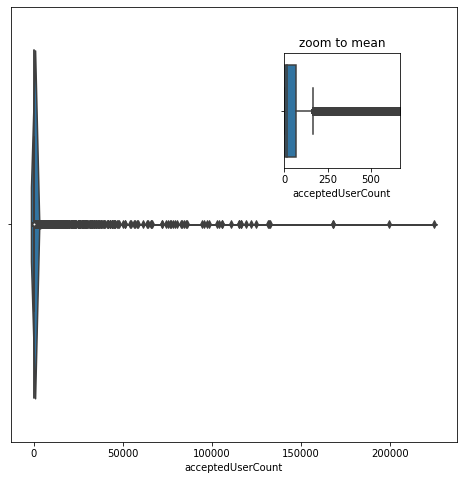

In [14]:
# 문제 데이터의 연속형 변수 컬럼 확인
# - accepted_user_count
fig, ax= plt.subplots(figsize=[8,8])
ax= sns.boxplot(df_problems.acceptedUserCount)
ax= sns.violinplot(df_problems.acceptedUserCount)

ax2 = plt.axes([0.6, 0.6, .2, .2], facecolor='w')
ax2= sns.boxplot(df_problems.acceptedUserCount, ax=ax2)
ax2.set_xlim([0,665])
ax2.set_title('zoom to mean')

In [15]:
print(df_problems.acceptedUserCount)

0        199179
1        168110
2         28569
3         37972
4         10649
          ...  
23477        64
23478        36
23479        32
23480        25
23481        44
Name: acceptedUserCount, Length: 23482, dtype: int64


문제별 맞은 사람 수가 평균 값인 665 근처로 쏠려있음.

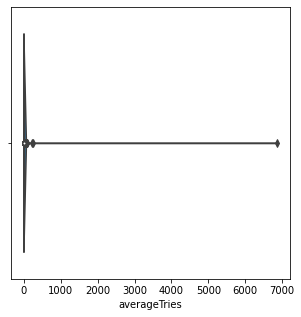

In [16]:
# avergeTries
fig, ax= plt.subplots(figsize=[5,5])
ax= sns.boxplot(df_problems.averageTries)
ax= sns.violinplot(df_problems.averageTries)

In [17]:
df_problems[df_problems.averageTries == 6847]

,problemId,titleKo,isSolvable,acceptedUserCount,level,averageTries,tags
9157,10944,랜덤 게임~~,True,50,0,6847,NaN


문제 시도 횟수에서 이전에 보았던 것처럼 6,847인 이상치가 하나 존재함.

Text(0.5, 1.0, 'zoom to mean')

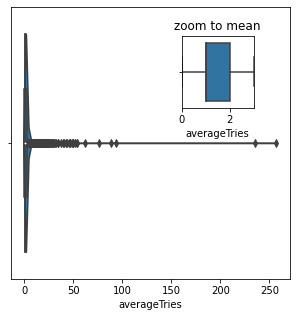

In [18]:
fig, ax= plt.subplots(figsize=[5,5])
ax= sns.boxplot(df_problems[df_problems.averageTries!=6847].averageTries)
ax= sns.violinplot(df_problems[df_problems.averageTries!=6847].averageTries)

ax2 = plt.axes([0.6, 0.6, .2, .2], facecolor='w')
ax2= sns.boxplot(df_problems[df_problems.averageTries!=6847].averageTries, ax=ax2)
ax2.set_xlim([0,3])
ax2.set_title('zoom to mean')

이상치를 제거했을 때, 평균값인 2에 평균 시도 횟수가 몰려있음.

averageTries가 6847인 데이터는 제외하는게 좋을 것으로 보임.

In [19]:
print('제거 전:', len(df_problems))
df_problems.drop(df_problems[df_problems.averageTries == 6847].index, axis=0, inplace=True)
print('제거 후:', len(df_problems))

제거 전: 23482
제거 후: 23481


In [20]:
# 유저가 맞힌 문제 수를 분석

In [21]:
def num(x):
    return len(str(x).split(','))

In [22]:
df_problems_solved['num']= df_problems_solved.problems.apply(num)
df_problems_solved[['id', 'num']]

,id,num
0,89800,5
1,89799,1
2,89798,1
3,89797,1
4,89796,1
...,...,...
89795,5,2753
89796,4,4207
89797,3,2269
89798,2,5867


In [23]:
df_problems_solved.num.describe()

count    89800.000000
mean       132.051058
std        206.767317
min          1.000000
25%         31.000000
50%         74.000000
75%        166.000000
max       6199.000000
Name: num, dtype: float64

유저가 푼 문제 수의 평균은 133개입니다.

Text(0.5, 1.0, 'zoom to mean')

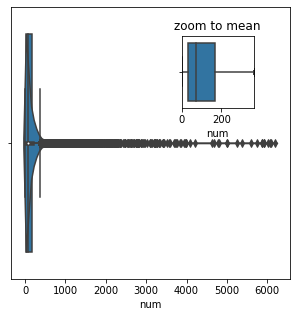

In [24]:
fig, ax= plt.subplots(figsize=[5,5])
ax= sns.boxplot(df_problems_solved.num)
ax= sns.violinplot(df_problems_solved.num)

ax2 = plt.axes([0.6, 0.6, .2, .2], facecolor='w')
ax2= sns.boxplot(df_problems_solved.num, ax=ax2)
ax2.set_xlim([0,363])
ax2.set_title('zoom to mean')

유저의 문제 풀이 수는 평균인 133개에 몰려있네요.

In [25]:
# 가장 문제를 많이 푼 유저는?

In [26]:
df_problems_solved[df_problems_solved.num== 11226]

,id,handle,problems,num


users에 기록된 koosaga의 solved_count인 11075와 값이 다르네요. 😮
  
이는 BOJ와 solved.ac에서 집계하는 문제 수의 차이, 부분 점수가 들어가는 100% 맞지 못한 문제 등 여러 요인으로 인한 것으로 보입니다.

In [27]:
# 유저 데이터에서 문제를 하나도 풀지 않은 사람의 수는 몇 명?
print("문제를 한 번도 안 푼 사람의 수 :", len(df_users.loc[df_users['solved_count'] == 0]))

문제를 한 번도 안 푼 사람의 수 : 1510


In [28]:
print(len(df_users))

89800


약 2%(1.6815)의 유저가 문제를 하나도 풀지 않았음을 알 수 있음.

In [29]:
# 문제의 알고리즘을 분류하는 태그의 종류 수 구하기
set_tags = set()
for tags in df_problems['tags'].dropna().values:
    for tag in tags.split(','):
        set_tags.add(tag)

In [30]:
print("tag의 종류 수 :", len(set_tags))

tag의 종류 수 : 191


총 191개의 태그가 존재한다는 것을 알 수 있음.

In [31]:
# 문제의 ID별로 제목, 풀린 횟수 그리고 레벨(티어)을 빠르게 읽을 수 있도록 dictionary 형태로 저장하기
id2title = dict() # 문제 id와 title을 딕셔너리로 저장
id2count = dict() # 문제 id별로 풀린 횟수를 세기 위한 딕셔너리 생성
id2level = dict() # 문제 id별로 레벨 딕셔너리
for i in tqdm(range(len(df_problems))):
    id2title[df_problems.iloc[i, 1]] = df_problems.iloc[i, 2]
    id2count[df_problems.iloc[i, 1]] = 0
    id2level[df_problems.iloc[i, 1]] = df_problems.iloc[i, 6]

100%|██████████| 23481/23481 [00:04<00:00, 4942.30it/s]


In [32]:
# 채점을 허용하지 않아서 아예 처음부터 풀 수 없는 문제는 무엇일까?
# is_solvable == False인 것들 확인
non_solvable = df_problems.loc[df_problems['isSolvable'] == False]
non_solvable

,problemId,titleKo,isSolvable,acceptedUserCount,level,averageTries,tags
378,1381,요구르트의 유통기한,False,39,0,6,NaN
852,1861,경로 찾기,False,0,0,0,NaN
1030,2046,이어달리기,False,0,0,0,NaN
1179,2199,DNA 해독 2,False,0,0,0,NaN
1594,2627,트리회전,False,0,0,0,NaN
...,...,...,...,...,...,...,...
22031,24021,Zathras,False,0,0,0,NaN
22032,24022,Seating Chart,False,0,0,0,NaN
22143,24135,ロゴマーク (Logo),False,0,0,0,NaN
22700,24734,Eerie Shadows,False,0,0,0,NaN


304개의 문제가 풀 수 없는 것으로 나타남.

In [33]:
# 아예 풀 수 없는 문제는 분석에서 제외

# isSolvable == False 인 문제는 제외
df_problems = df_problems.drop(index=non_solvable.index).reset_index(drop=True)
df_problems

,problemId,titleKo,isSolvable,acceptedUserCount,level,averageTries,tags
0,1000,A+B,True,199179,1,2,"implementation,arithmetic,math"
1,1001,A-B,True,168110,1,1,"implementation,arithmetic,math"
2,1002,터렛,True,28569,8,4,"geometry,math"
3,1003,피보나치 함수,True,37972,8,3,dp
4,1004,어린 왕자,True,10649,8,2,geometry
...,...,...,...,...,...,...,...
23172,25565,딸기와 토마토,True,64,11,2,"case_work,implementation"
23173,25566,김밥,True,36,17,1,"coordinate_compression,data_structures,segtree..."
23174,25567,줄 세우기,True,32,18,2,"data_structures,deque,disjoint_set,linked_list..."
23175,25568,피라미드,True,25,15,1,"ad_hoc,greedy"


In [34]:
# 문제 레벨(티어) 분석

# 문제 레벨 종류 확인하기
print(sorted(df_problems['level'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


0부터 30까지의 정수로 이루어져 있음.

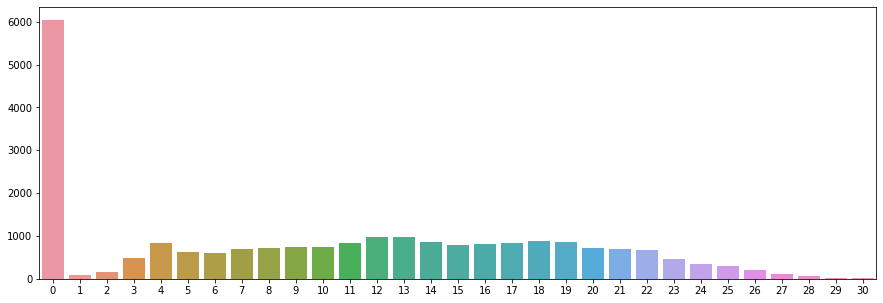

In [35]:
# 문제 레벨 분포 확인하기

level_cnt = df_problems['level'].value_counts().sort_index()

plt.figure(figsize=(15,5))
sns.barplot(x=level_cnt.index, y=level_cnt.values)

레벨이 0인 것이 너무 많음.
  
레벨이 0인 문제는 난이도가 매겨지지 않은 문제이므로 이를 제외하여 분포를 다시 그린다.

In [36]:
# level이 0인 것을 제외한 후 다시 분포를 확인.
df_problems = df_problems.loc[df_problems['level'] != 0].reset_index(drop=True)

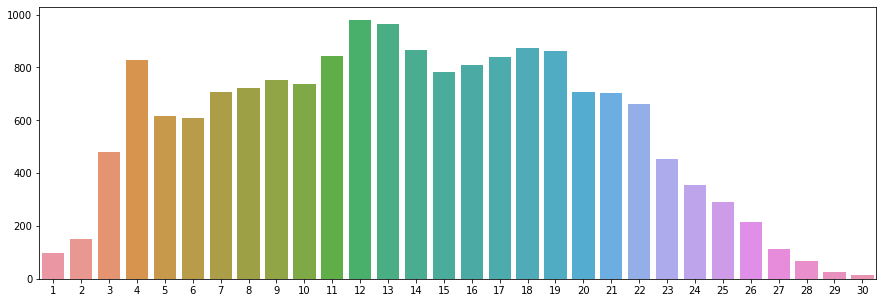

In [37]:
level_cnt = df_problems['level'].value_counts().sort_index()

plt.figure(figsize=(15,5))
sns.barplot(x=level_cnt.index, y=level_cnt.values)

난이도가 매겨진 문제들은 중간 부분의 레벨에 많이 분표해있음.
  
가장 많이 분포한 레벨은 브론즈 2이고, 그 외의 골드4와 골드 3에도 많이 분포한 것을 볼 수 있음.
  
즉, 중간 정도의 난이도를 가진 문제들이 대체로 많이 난이도가 매겨졌다고 볼 수 있음.

In [38]:
# 유저별 푼 문제 분석

# 유저들이 어떠한 문제를 많이 풀었는지, 어떤 태그 위주의 문제를 주로 풀었는지 분석


# 문제별로 풀린 횟수 계산
for i in tqdm(range(len(df_problems_solved))):
    try:
        pro = list(df_problems_solved.iloc[i, 2].split(','))
        for j in pro:
            j = int(j)
            id2count[j] += 1
    except:
        pass

100%|██████████| 89800/89800 [00:05<00:00, 17851.79it/s]


In [39]:
# 문제별로 풀린 횟수를 계산한 데이터프레임
# count 컬럼이 풀린 횟수.
df_problem_count = pd.DataFrame({'problem_id' : id2count.keys(), 'count' : id2count.values()})
df_problem_count['title'] = df_problem_count['problem_id'].apply(lambda x : id2title[x])
df_problem_count['level'] = df_problem_count['problem_id'].apply(lambda x : id2level[x])
df_problem_count.sort_values('count', inplace=True, ascending=False)
df_problem_count[:10]

,problem_id,count,title,level
0,A+B,0,True,"combinatorics,math"
14380,kdh9949,0,True,"dp,graphs"
14388,"교준이의 심부름꾼, 민제의 고충 (""Circle"" Ver.)",0,True,"bfs,centroid,centroid_decomposition,data_struc..."
14387,MST and Rectangles,0,True,NaN
14386,Bohemian Rhaksody,0,True,"divide_and_conquer,divide_and_conquer_optimiza..."
14385,Cactus Determinant,0,True,"articulation,cactus,dp,dp_tree,graphs,trees"
14384,Fruit Tree,0,True,"data_structures,lca,majority_vote,pst,segtree,..."
14383,Good Set,0,True,"backtracking,bitmask,combinatorics,math"
14382,Hard To Explain,0,True,"cht,data_structures,segtree"
14381,필살! 60단 컴보,0,True,"bitmask,dp"


In [40]:
# 어떤 태그가 많이 풀렸나?

# isSolvable == True, level > 0인 문제들의 태그 분포 확인
dict_tag_cnt = {i:int(j) for i, j in zip(set_tags, np.zeros(len(set_tags)))}
for i in tqdm(range(len(df_problems))):
    tags = df_problems.iloc[i, 6]
    try:
        for tag in tags.split(','):
            dict_tag_cnt[tag] += 1
    except:
        pass

100%|██████████| 17137/17137 [00:00<00:00, 22035.66it/s]


In [41]:
# 많이 풀린 tag 횟수에 관한 데이터프레임
# tag_count 컬럼이 각 tag별 풀린 횟수

df_tag_count = pd.DataFrame({'tag' : dict_tag_cnt.keys(), 'tag_count' : dict_tag_cnt.values()})
df_tag_count.sort_values('tag_count', ascending=False, inplace=True)
df_tag_count.reset_index(drop=True, inplace=True)
df_tag_count[:10]

,tag,tag_count
0,math,4511
1,implementation,3955
2,dp,2795
3,graphs,2636
4,data_structures,2603
5,string,1783
6,greedy,1609
7,bruteforcing,1571
8,graph_traversal,1463
9,sorting,1266


추후 대표 태그를 선정해 input으로 사용해도 좋을 것이라고 판단함.

In [42]:
# 유저가 최근에 어떠한 문제들을 많이 풀었는지?

# 모든 유저가 최근에 풀었던 문제 종류 수
print("모든 유저가 최근에 풀었던 문제 종류 수 :", df_records_solved['problem'].nunique(), "개")

모든 유저가 최근에 풀었던 문제 종류 수 : 12118 개


In [43]:
# 유저가 같은 문제에 관해 "맞았습니다" 제출을 여러 번 했으면 가장 최근 풀었던 기록만 남겨둘게요.

In [44]:
# 사용자가 똑같은 문제를 풀었다면 최근에 풀었던 기록만 남겨둠.
df_records_solved = df_records_solved.drop_duplicates(subset=('handle', 'problem')).reset_index(drop=True)
df_records_solved

,handle,problem,timestamp
0,koosaga,19195,2022-09-16 14:20
1,koosaga,24676,2022-09-16 14:01
2,koosaga,22039,2022-09-16 13:43
3,koosaga,12937,2022-09-16 13:33
4,koosaga,25509,2022-09-16 2:42
...,...,...,...
585116,etyoungsu,2805,2022-08-18 19:33
585117,etyoungsu,18870,2022-08-16 21:36
585118,etyoungsu,1789,2022-08-15 21:30
585119,etyoungsu,10816,2022-08-15 2:40


In [45]:
# 최근 "맞았습니다" 기록에서 문제를 10개 이상 푼 유저의 수는 몇 명일까요?

In [46]:
group_records_solved = df_records_solved.groupby('handle')['problem'].count()
print("문제를 10개 이상 푼 유저의 수 :", len(group_records_solved[group_records_solved >= 10]), '명')

문제를 10개 이상 푼 유저의 수 : 11755 명


만약 "맞았습니다" 데이터를 사용할 수 있으면 약 88%의 유저는 최근에 푼 10개 이상의 문제를 기반으로 좀 더 개인화된 문제를 추천할 수 있겠네요.
  
하지만 최근 채점 데이터는 웹 스크레이핑이 불가하므로 추천 모델링에는 사용하기가 어려워보입니다. 😢
  
나중에 기회가 되면 sequential model 제작에 도전해 봐야겠네요. 🧐

In [47]:
# 비슷한 문제 탐색 방법 테스트
# 어떤 한 문제와 유사한 문제는 어떻게 찾는 게 좋을까? 다양한 방법으로 시도해보기
# 예시로 문제 1027번과 유사한 문제를 다양한 방법으로 찾아보기

df_problems.loc[df_problems['problemId'] == 1027]

,problemId,titleKo,isSolvable,acceptedUserCount,level,averageTries,tags
27,1027,고층 건물,True,1765,12,2,"bruteforcing,geometry,math"


In [48]:
# 1. cosine 유사도

# 코사인 유사도 기반
df_for_test = df_problems[['problemId', 'titleKo', 'level', 'averageTries']]
for i in list(list(set_tags)):
    df_for_test[i] = 0

for i in tqdm(range(len(df_problems))):
    tags = df_problems.iloc[i, 6]
    try:
        for tag in tags.split(','):
            df_for_test.iloc[i, list(df_for_test.columns).index(tag)] += 1
    except:
        pass

temp = df_for_test.iloc[:, 2:].values
sim = cs(temp, temp)

sim_scores = list(enumerate(sim[27]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:20]
print(sim_scores)

100%|██████████| 17137/17137 [00:19<00:00, 885.03it/s]


[(14959, 1.0), (16990, 0.9991331267720568), (2523, 0.999077451894025), (10997, 0.9976266236386511), (14585, 0.99748154596412), (198, 0.9974255915475291), (4870, 0.9970903000004658), (7469, 0.996732097101857), (1041, 0.9966832412776431), (1948, 0.9966832412776431), (3853, 0.9966832412776431), (8847, 0.9966832412776431), (6108, 0.9965693281118013), (15888, 0.9965693281118013), (5588, 0.9965262709260471), (7912, 0.9965262709260471), (8063, 0.9965262709260471), (8580, 0.9965262709260471), (11799, 0.9965262709260471)]


In [49]:
# 구한 cosine 유사도 값이 가장 높은 문제 정보를 확인

idx = np.array(sim_scores)[:, 0]
df_for_cos = df_for_test.iloc[idx]
df_for_cos

,problemId,titleKo,level,averageTries,geometry_hyper,euclidean,calculus,coordinate_compression,line_intersection,geometry_3d,...,precomputation,hirschberg,polygon_area,degree_sequence,arithmetic,topological_sorting,tree_set,simulated_annealing,pollard_rho,bfs
14959,22294,SMH,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16990,25357,Connect the Points,10,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2523,4135,How Big Is It?,15,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10997,16860,Are You Listening?,9,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14585,21676,Газон,10,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,1198,삼각형으로 자르기,9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4870,8484,Trójkąty,14,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7469,12329,Bullseye (Small),8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1041,2137,가장 가까운 분수,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1948,3164,패턴,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# 유클리드 거리 기반으로 유사한 문제 구하기


# 그전에 두 좌표 사이의 거리를 구하는 식을 함수로 정의
def dist(x,y):
    return np.sqrt(np.sum((x-y)**2))

In [51]:
# 유클리드 거리 기반 유사한 문제 구하기
problem_idx = 27
list_dist = []
for i, j in tqdm(enumerate(temp)):
    list_dist.append((i, dist(temp[problem_idx], j)))

17137it [00:00, 54717.96it/s]


In [52]:
list_dist = sorted(list_dist, key = lambda x : x[1])
list_dist = list_dist[:20]
print(list_dist)

[(27, 0.0), (14959, 0.0), (1041, 1.0), (1948, 1.0), (3853, 1.0), (8847, 1.0), (387, 1.4142135623730951), (825, 1.4142135623730951), (883, 1.4142135623730951), (2852, 1.4142135623730951), (3586, 1.4142135623730951), (5215, 1.4142135623730951), (5588, 1.4142135623730951), (6010, 1.4142135623730951), (6081, 1.4142135623730951), (6108, 1.4142135623730951), (6298, 1.4142135623730951), (6523, 1.4142135623730951), (7034, 1.4142135623730951), (7912, 1.4142135623730951)]


In [53]:
# 문제간 거리가 가까울수록 유사한 문제
df_for_euclidean = df_for_test.iloc[np.array(list_dist)[1:,0]]
df_for_euclidean

,problemId,titleKo,level,averageTries,geometry_hyper,euclidean,calculus,coordinate_compression,line_intersection,geometry_3d,...,precomputation,hirschberg,polygon_area,degree_sequence,arithmetic,topological_sorting,tree_set,simulated_annealing,pollard_rho,bfs
14959,22294,SMH,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1041,2137,가장 가까운 분수,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1948,3164,패턴,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3853,6199,Big Square,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8847,14279,두 수의 곱,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
387,1407,2로 몇 번 나누어질까,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
825,1891,사분면,12,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
883,1954,화학실험,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2852,4651,Transmitters,12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3586,5884,감시 카메라,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


코사인 유사도보다는 유클리드 기반으로 거리가 가까운 문제를 구한 것의 레벨이 전반적으로 비교 대상인 1027번 문제의 레벨과 비슷한 것을 볼 수 있습니다.

In [54]:
df_for_cos[(df_for_cos.bruteforcing == 1) & (df_for_cos.geometry == 1) & (df_for_cos.math == 1)]

,problemId,titleKo,level,averageTries,geometry_hyper,euclidean,calculus,coordinate_compression,line_intersection,geometry_3d,...,precomputation,hirschberg,polygon_area,degree_sequence,arithmetic,topological_sorting,tree_set,simulated_annealing,pollard_rho,bfs
14959,22294,SMH,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16990,25357,Connect the Points,10,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2523,4135,How Big Is It?,15,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10997,16860,Are You Listening?,9,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14585,21676,Газон,10,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,1198,삼각형으로 자르기,9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4870,8484,Trójkąty,14,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7469,12329,Bullseye (Small),8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df_for_euclidean[(df_for_euclidean.bruteforcing == 1) & (df_for_euclidean.geometry == 1) & (df_for_euclidean.math == 1)]

,problemId,titleKo,level,averageTries,geometry_hyper,euclidean,calculus,coordinate_compression,line_intersection,geometry_3d,...,precomputation,hirschberg,polygon_area,degree_sequence,arithmetic,topological_sorting,tree_set,simulated_annealing,pollard_rho,bfs
14959,22294,SMH,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


그러나 문제 1027번의 태그와 가장 유사하게 추천된 방법은 코사인 유사도.
두 방법을 적절히 조화해서 추천을 하든가, 아니면 레벨과 태그에 관해 필터링 할 때 각 경우에 관해 좀 더 나은 성능을 보이는 방법을 고려 가능. 

In [56]:
# 푼 문제가 없지만 경험치 또는 티어가 존재하는 유저

# 푼 문제 수가 0인 유저를 다시 한 번 학인해 봄
df_users[df_users.solved_count == 0]

,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization
81193,mulijoa,0,0,0,25,0,0,0,1750000,0,1,0,149744,NaN
81289,chsun0303,0,0,0,24,0,0,0,310000,0,0,0,149940,NaN
81548,fsedge,0,0,0,23,0,0,0,220000,0,1,1,150449,NaN
81686,b0n0b0n0,0,0,0,22,0,0,0,210000,0,0,0,150737,NaN
82043,cloudburst1398,0,0,0,21,0,0,0,170000,0,0,0,151444,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89795,yooui0204,0,0,0,0,0,0,0,0,0,0,0,166946,NaN
89796,yooveloper,0,0,0,0,0,0,0,0,0,0,0,166947,NaN
89797,youhk43,0,0,0,0,0,0,0,0,0,0,0,166948,NaN
89798,youjong12,0,0,0,0,0,0,0,0,0,0,0,166949,NaN


In [57]:
print('푼 문제 수가 0인 유저(1,510명) 중 rating이나 exp가 0이 아닌 유저들:',len(df_users[(df_users.solved_count == 0) & ((df_users.rating !=0)|(df_users.exp !=0))]))

푼 문제 수가 0인 유저(1,510명) 중 rating이나 exp가 0이 아닌 유저들: 19


1,510명 중 rating이나 exp가 0이 아닌 유저들은 19명 입니다.

해당 유저들은 데이터를 받아오는 solved.ac에서 제재당한 유저일 가능성이 큽니다.
대표적인 solved.ac에서 사용자를 제재하는 경우 : 부정행위로 문제를 맞춘 경우
이와 비슷한 경우로 발생한 데이터로는 푼 문제 수가 0개가 아니지만 rating과 exp가 모두 0인 유저들이 데이터로 남아있습니다.

In [58]:
# 1,510명은 푼 문제에 대한 정보가 존재하지 않으므로 해당 유저들은 df_users에서 제거

print('solved_count가 0인 유저들 제거 전:', len(df_users))
df_users.drop(df_users[df_users.solved_count == 0].index.to_list(), inplace=True)
print('solved_count가 0인 유저들 제거 전:', len(df_users))

solved_count가 0인 유저들 제거 전: 89800
solved_count가 0인 유저들 제거 전: 88290


In [59]:
df_users[df_users.solved_count == 0]

,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization


In [60]:
# 유저 클래스 분석

# 유저 클래스 통계를 확인
df_users.user_class.describe()

count    88290.000000
mean         1.407215
std          1.534881
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: user_class, dtype: float64

In [61]:
# class가 0인 유저를 살펴봄

df_users[df_users.user_class==0]

,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization
80,300iq,262,0,26,2729,2577,0,128,1794688283,0,0,0,81,NaN
195,aeren,458,0,24,2543,2384,0,157,998710092,0,2,6,196,323.0
265,snowflake,490,0,23,2462,2277,0,160,640037472,19,24,19,266,331.0
283,larryzhong,291,0,23,2444,2310,0,134,732866224,0,0,9,284,NaN
346,jiangly,212,0,22,2381,2266,0,115,738716154,0,7,4,347,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89700,wish1234567,78,0,0,0,0,0,0,0,0,1,9,166801,451.0
89704,wjd0632,48,0,0,0,0,0,0,0,0,0,5,166805,NaN
89727,wodnr2203,97,0,0,0,0,0,0,0,0,0,3,166828,1348.0
89759,yasuicide,45,0,0,0,0,0,0,0,0,0,0,166910,NaN


In [62]:
# 푼 문제 수가 0이 아니지만 rating과 exp(경험치)가 모두 0인 유저들

print('class가 0인 유저들 중 rating과 exp가 모두 0인 유저:',len(df_users[(df_users.user_class==0) & (df_users.rating ==0) & (df_users.exp ==0)]))

class가 0인 유저들 중 rating과 exp가 모두 0인 유저: 104


In [63]:
df_problems_solved[df_problems_solved.handle.isin(list(df_users[(df_users.user_class==0) & (df_users.rating ==0) & (df_users.exp ==0)]['handle']))]

,id,handle,problems,num
36,89764,ydh2244,"1000,1001,1003,1008,1010,1012,1014,1017,1018,1...",771
40,89760,yasuicide,"1201,1260,1787,1920,2178,5466,5537,8131,8873,8...",42
72,89728,wodnr2203,"1000,1001,1002,1003,1008,1009,1010,1032,1037,1...",109
95,89705,wjd0632,"1000,1001,1002,1008,1020,1182,1269,1654,1707,1...",47
99,89701,wish1234567,"1000,1001,1008,1050,1110,1112,1152,1271,1330,1...",78
...,...,...,...,...
1529,88271,alpha3393,"1021,1026,1067,1077,1181,1427,1697,1826,1916,1...",29
1532,88268,alisherka7,"1000,1001,1002,1003,1004,1005,1006,1007,1008,1...",137
1570,88230,7ucky77,"1031,1071,1185,1368,1708,2150,2557,2887,6091,1...",18
1581,88219,214y,NaN,1


이 11명의 유저들 중엔 problems_solved에 기록된 유저(6명)도 있고 아닌 유저도 있습니다.

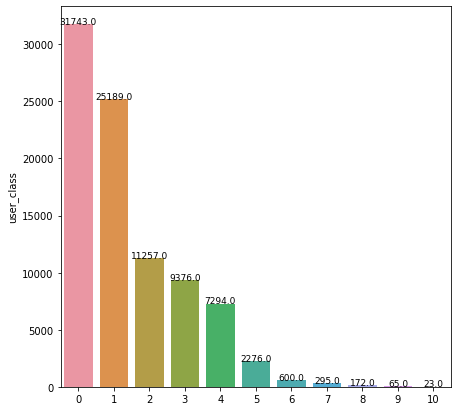

In [64]:
# 유저의 클래스 분포를 확인

plt.subplots(figsize=(7,7))
df_users.user_class.astype('str')
ax=sns.barplot(df_users.user_class.astype('str').value_counts().index,df_users.user_class.astype('str').value_counts())

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3.5, height, ha = 'center', size = 9)


class가 높아질수록 그에 해당하는 유저 수도 감소.

In [65]:
# 유저 티어 분석

# 유저 티어 통계를 살펴봄.
df_users.tier.describe()

count    88290.000000
mean         7.873157
std          5.144142
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         31.000000
Name: tier, dtype: float64

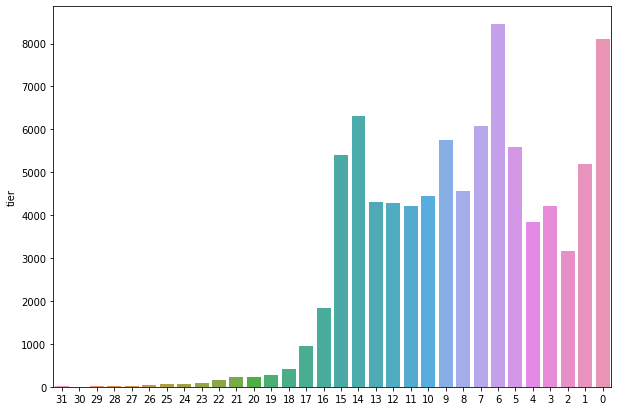

In [66]:
plt.subplots(figsize=(10,7))
df_users.tier.astype('str')
ax=sns.barplot(df_users.tier.astype('str').value_counts().index,df_users.tier.astype('str').value_counts(), order= df_users.tier.astype('str').unique())

user_class와 달리 tier는 0과 6-7(실버 1~2) 티어에 유저들이 많이 분포함.
  
14, 15 티어에 또한 유저들이 많이 분포.

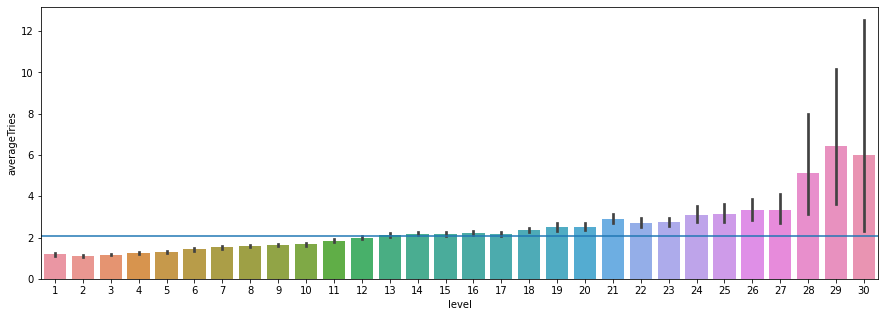

In [67]:
# 문제 레벨별 데이터 분석

# 문제 레벨별 문제 평균 시도 횟수
plt.figure(figsize=(15,5))
graph = sns.barplot(x=df_problems.level, y=df_problems.averageTries)
graph.axhline(np.mean(df_problems.averageTries))
plt.show()

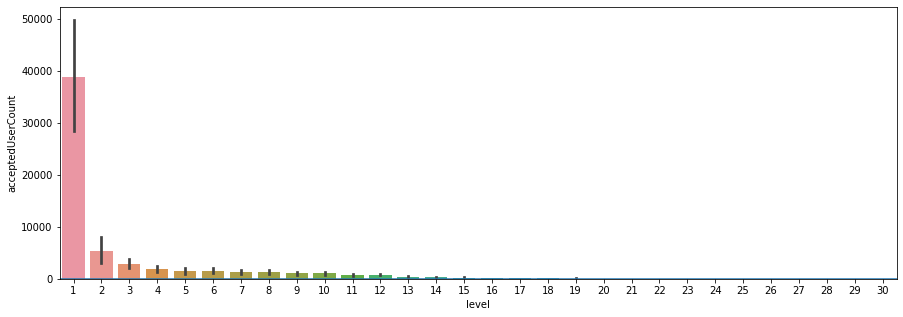

In [68]:
# 문제 레벨별 맞힌 사람 수의 분포

plt.figure(figsize=(15,5))
graph = sns.barplot(x=df_problems.level, y=df_problems.acceptedUserCount)
graph.axhline(np.mean(df_problems.averageTries))
plt.show()

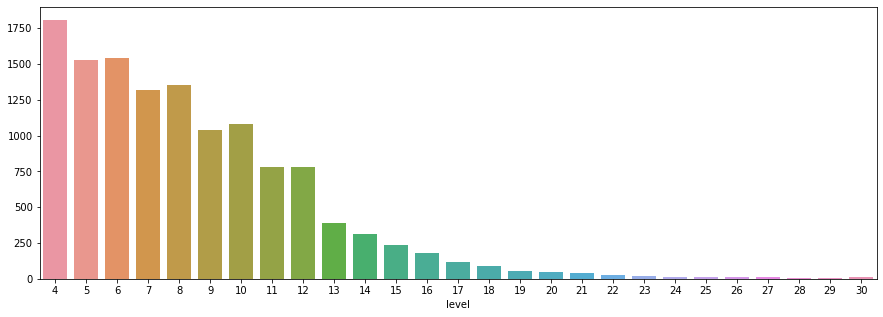

In [69]:
# 레벨이 1에서 3인 것을 제외하고 조회
tmp = df_problems.groupby('level')['acceptedUserCount'].mean()[df_problems.groupby('level')['acceptedUserCount'].mean() < 2000]

plt.figure(figsize=(15,5))
graph = sns.barplot(x=tmp.index, y=tmp.values)
plt.show()

대체로 입문 단계인 하위권 문제가 많이 풀렸고, 하위권 문제를 제외하여도 문제의 난이도가 높아질 수록 맞힌 유저의 수는 급격히 감소.

In [70]:
# 문제 레벨별 태그 분석.

# 각 문제 레벨별 태그 종류의 수를 집계.


# tag에 nan 값이 있는 행들 삭제
new_df_problems = df_problems.dropna()

# 각 레벨별 태그 유형별 개수 저장
tags_per_level = {}

for x in df_problems.level.unique():
    levelx_tags = ','.join(new_df_problems[new_df_problems.level == x].tags.values).split(',')
    levelx_tags = pd.DataFrame(pd.Series(levelx_tags).value_counts())
    levelx_tags.reset_index(inplace=True, drop=False)
    levelx_tags.columns = ['tag', 'level'+str(x)]
    
    tags_per_level["level" + str(x)] = levelx_tags

In [71]:
# 레벨 1의 태그별 분포

# level1인 경우
tags_per_level['level1']

,tag,level1
0,implementation,69
1,math,53
2,arithmetic,48
3,arbitrary_precision,9
4,string,9
5,combinatorics,1
6,geometry,1
7,simulation,1


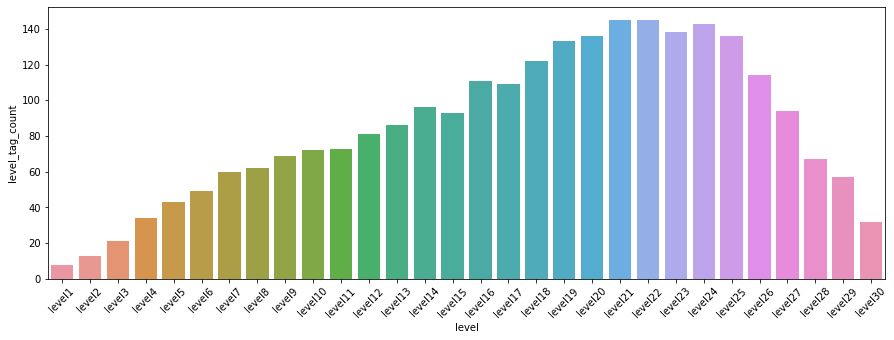

In [72]:
# 문제의 레벨별로 속해있는 태그 수

level_tags = pd.DataFrame(columns={'level', 'level_tag_count'})

for i in range(1, 31):
    level_tags = level_tags.append({'level': 'level'+str(i), 'level_tag_count': len(tags_per_level['level'+str(i)])}, ignore_index=True)
    
plt.figure(figsize=(15,5))
graph = sns.barplot(x=level_tags.level, y=level_tags.level_tag_count)

for item in graph.get_xticklabels():
    item.set_rotation(45)

plt.show()

In [73]:
# 태그별 문제 레벨 분석

# 각 태그별로 각 레벨에 몇 번 등장하는지 구하기


# 각 태그별 모든 레벨 값을 merge한다.
tags_all_level = pd.merge(tags_per_level['level1'], tags_per_level['level2'], on='tag', how='outer')

for i in range(3, 31):
    tags_all_level = pd.merge(tags_all_level, tags_per_level['level'+str(i)], on='tag', how='outer')

In [74]:
tags_all_level.fillna(0, inplace=True)
tags_all_level.head()

,tag,level1,level2,level3,level4,level5,level6,level7,level8,level9,...,level21,level22,level23,level24,level25,level26,level27,level28,level29,level30
0,implementation,69.0,97.0,314.0,629.0,451.0,334.0,298.0,256.0,208.0,...,35.0,30.0,27.0,31.0,22.0,17.0,4.0,9.0,8.0,4.0
1,math,53.0,98.0,333.0,332.0,212.0,205.0,214.0,217.0,216.0,...,151.0,137.0,93.0,81.0,65.0,45.0,32.0,21.0,6.0,5.0
2,arithmetic,48.0,77.0,229.0,166.0,58.0,28.0,20.0,15.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,arbitrary_precision,9.0,1.0,10.0,16.0,4.0,16.0,12.0,11.0,4.0,...,7.0,3.0,5.0,0.0,1.0,3.0,1.0,1.0,0.0,1.0
4,string,9.0,16.0,33.0,311.0,185.0,136.0,129.0,132.0,89.0,...,34.0,31.0,30.0,11.0,17.0,11.0,8.0,1.0,1.0,1.0


In [75]:
# 각 태그별로 각 레벨에 어떻게 분포되어 있는지를 확인

# 각 레별별 태그의 비율 분포를 확인하기 (상대비교를 위해 각 레벨의 태그 개수를 문제 수 만큼 나누기)
tags_all_level_ratio = tags_all_level.copy()

# 각 레벨별 문제 수 정리
level_ques = pd.DataFrame(new_df_problems.level.value_counts())
level_ques.reset_index(inplace=True, drop=False)
level_ques.columns = ['level', 'nums']

# 각 레벨의 태그 개수에서 문제 수 나누기
for i in range(1, 31):
    tags_all_level_ratio['level'+str(i)] = tags_all_level['level'+str(i)]/level_ques[level_ques['level'] == i].nums.values[0]

In [76]:

tags_all_level_ratio

,tag,level1,level2,level3,level4,level5,level6,level7,level8,level9,...,level21,level22,level23,level24,level25,level26,level27,level28,level29,level30
0,implementation,0.711340,0.638158,0.654167,0.760580,0.730956,0.547541,0.426934,0.361072,0.279946,...,0.055031,0.053191,0.068878,0.107639,0.087649,0.093923,0.037736,0.163636,0.347826,0.307692
1,math,0.546392,0.644737,0.693750,0.401451,0.343598,0.336066,0.306590,0.306065,0.290713,...,0.237421,0.242908,0.237245,0.281250,0.258964,0.248619,0.301887,0.381818,0.260870,0.384615
2,arithmetic,0.494845,0.506579,0.477083,0.200726,0.094003,0.045902,0.028653,0.021157,0.020188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,arbitrary_precision,0.092784,0.006579,0.020833,0.019347,0.006483,0.026230,0.017192,0.015515,0.005384,...,0.011006,0.005319,0.012755,0.000000,0.003984,0.016575,0.009434,0.018182,0.000000,0.076923
4,string,0.092784,0.105263,0.068750,0.376058,0.299838,0.222951,0.184814,0.186178,0.119785,...,0.053459,0.054965,0.076531,0.038194,0.067729,0.060773,0.075472,0.018182,0.043478,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,geometric_boolean_operations,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.007968,0.000000,0.000000,0.000000,0.000000,0.000000
187,a_star,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.003984,0.000000,0.000000,0.000000,0.000000,0.000000
188,top_tree,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.005525,0.000000,0.000000,0.000000,0.076923
189,rb_tree,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.005525,0.000000,0.000000,0.000000,0.000000


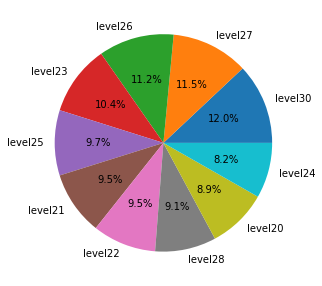

In [77]:
# 가장 대표적인 태그인 data_structures를 예시로 상위 레벨에서의 분포로 확인

tag_name = 'data_structures'

plt.figure(figsize=(5,5))

x = tags_all_level_ratio[tags_all_level_ratio['tag'] == tag_name].T.iloc[1:,:]
x.columns = ['ratio']
x = x.sort_values('ratio', ascending=False)[:10]

ratio = x['ratio'].values
labels = x.index

#explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

plt.pie(ratio, labels=labels, autopct='%.1f%%')#, explode=explode)
plt.show()

대표적으로 기본이 되는 태그인 data_structures는 난이도별 등장 분포가 골고루 나오기도 함.

In [78]:
# 각 문제의 태그 종류 수 분석

# 각 문제에 태그가 몇 종류 등장하는지를 확인

problem_tags = df_problems.tags.str.split(',')
problem_tags.fillna('0', inplace=True)
df_problems['tag_num'] = problem_tags.apply(lambda x: len(x))
df_problems.head()

,problemId,titleKo,isSolvable,acceptedUserCount,level,averageTries,tags,tag_num
0,1000,A+B,True,199179,1,2,"implementation,arithmetic,math",3
1,1001,A-B,True,168110,1,1,"implementation,arithmetic,math",3
2,1002,터렛,True,28569,8,4,"geometry,math",2
3,1003,피보나치 함수,True,37972,8,3,dp,1
4,1004,어린 왕자,True,10649,8,2,geometry,1


In [79]:
# 태그가 없는 문제도 tag_num이 1로 집계되는 현상 없애기

# null인 인덱스의 태그 값 제거
tags_null_idx = df_problems[df_problems.tags.isnull()].index
df_problems.loc[tags_null_idx, 'tag_num'] -= 1

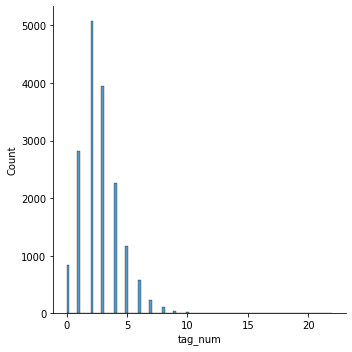

In [80]:
# 문제별 태그 종류 수 분포

sns.displot(df_problems.tag_num, bins=100)

대체로 문제별로 두 개의 태그가 가장 많이 등장하는 것으로 보이네요.

In [81]:
# 라이벌과 역라이벌 수 분석

# 유저별 라이벌과 역라이벌 수에 관한 통계 살펴봄

In [82]:
df_users.rival_count.describe()


count    88290.000000
mean         0.408200
std          2.371266
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        160.000000
Name: rival_count, dtype: float64

In [83]:
df_users.reverse_rival_count.describe()

count    88290.000000
mean         0.410171
std          1.864797
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        122.000000
Name: reverse_rival_count, dtype: float64

In [84]:
# 얼마나 많은 유저가 solved.ac의 라이벌 기능을 이용하고 있는지?

print('rival 수가 0인 유저 비율:',sum(df_users.rival_count==0)/len(df_users))
print('reverse_rival 수가 0인 유저 비율:',sum(df_users.reverse_rival_count==0)/len(df_users))
print('reverse_rival과 rival 수가 0인 유저 비율:',sum((df_users.reverse_rival_count==0) & (df_users.rival_count==0))/len(df_users))

rival 수가 0인 유저 비율: 0.890972930116661
reverse_rival 수가 0인 유저 비율: 0.8486125268999887
reverse_rival과 rival 수가 0인 유저 비율: 0.828123230263903


전체 유저 중 약 83%가 현재 제공되고 있는 라이벌 기능을 사용하지 않고 있음. 
대다수의 유저가 라이벌 기능을 사용하지 않는 만큼, 라이벌 추천 서비스를 제공하면 조금이나마 라이벌 기능을 활성화시킬 수 있지 않을까요?

🔖 라이벌 관련 실험 및 결과
  
라이벌에 관해 분석한 데이터를 바탕으로 가설을 세우고 검증해볼게요.
이를 통해 어떤 방법으로 추천 모델을 만들어야 할지, 필터링은 어떤 식으로 해야할지 고민해 봅시다.

In [85]:
# 가설 1: 라이벌이 있는 유저들은 그렇지 않은 유저들에 비해 문제를 더 많이 풉니다.

df_check_rival = df_users.copy()
df_check_rival['has_rival'] = 'NO'

idx = df_check_rival[df_check_rival.rival_count >= 1].index
df_check_rival.loc[idx, 'has_rival'] = 'YES'
df_check_rival

,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization,has_rival
0,koosaga,11522,10,31,3264,2814,250,175,15362924779,5,122,24,1,394.0,YES
1,cki86201,6088,10,31,3225,2775,250,175,10013721021,0,30,3,2,299.0,NO
2,mitnegativeinfinity,2267,10,31,3176,2726,250,175,6416744374,0,12,8,3,440.0,NO
3,ainta,4172,10,31,3156,2706,250,175,7428922337,0,14,2,4,299.0,NO
4,yclock,2730,10,31,3126,2676,250,175,4336235487,4,16,6,5,299.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89700,wish1234567,78,0,0,0,0,0,0,0,0,1,9,166801,451.0,NO
89704,wjd0632,48,0,0,0,0,0,0,0,0,0,5,166805,NaN,NO
89727,wodnr2203,97,0,0,0,0,0,0,0,0,0,3,166828,1348.0,NO
89759,yasuicide,45,0,0,0,0,0,0,0,0,0,0,166910,NaN,NO


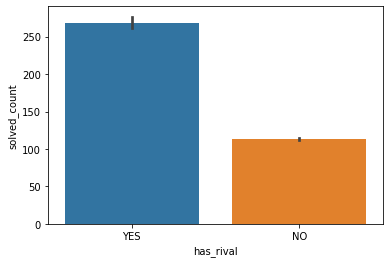

In [86]:
sns.barplot(x='has_rival', y = 'solved_count', data=df_check_rival)

rival이 있는 유저들이 rival이 없는 유저들에 비에 2배 이상 문제를 더 많이 푸네요.
  
역시 라이벌 기능을 이용하고 있는 사람은 알고리즘 문제를 대체로 더 많이 푸는 것으로 보입니다.

In [87]:
df_check_rival['has_rival'] = np.where(df_check_rival['has_rival']=='YES', 1 ,0)
stats.pointbiserialr(df_check_rival['has_rival'], df_check_rival['solved_count']).correlation

0.2273032881308076

상관관계가 0.2273로 약한 양의 상관관계를 보여주네요.
  
[정리]
  
rival의 여부와 문제 푸는 횟수는 약한 양의 상관관계를 보입니다.
  
rival이 있는 유저들이 rival이 없는 유저들에 비에 2배 이상의 문제를 더 많이 풉니다.
  
→ rival이 있으면 유저들이 문제를 더 많이 풉니다.
  
→ rival을 등록할 수 있도록 적절한 라이벌 추천해주면 유저들이 문제를 더 많이 풀어서 개인 실력 향상과 백준 사이트의 활성화에 도움을 줄 것으로 보입니다. 🥳

In [88]:
# 가설 2: 라이벌이 많을수록 문제를 더 많이 풉니다.

# 가설 배경: 적절한 추천 라이벌 수를 찾기 위해

In [89]:
df_check_rival

,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization,has_rival
0,koosaga,11522,10,31,3264,2814,250,175,15362924779,5,122,24,1,394.0,1
1,cki86201,6088,10,31,3225,2775,250,175,10013721021,0,30,3,2,299.0,0
2,mitnegativeinfinity,2267,10,31,3176,2726,250,175,6416744374,0,12,8,3,440.0,0
3,ainta,4172,10,31,3156,2706,250,175,7428922337,0,14,2,4,299.0,0
4,yclock,2730,10,31,3126,2676,250,175,4336235487,4,16,6,5,299.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89700,wish1234567,78,0,0,0,0,0,0,0,0,1,9,166801,451.0,0
89704,wjd0632,48,0,0,0,0,0,0,0,0,0,5,166805,NaN,0
89727,wodnr2203,97,0,0,0,0,0,0,0,0,0,3,166828,1348.0,0
89759,yasuicide,45,0,0,0,0,0,0,0,0,0,0,166910,NaN,0


In [90]:
df_has_rival = df_check_rival[df_check_rival.has_rival == 1]
df_has_rival

,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization,has_rival
0,koosaga,11522,10,31,3264,2814,250,175,15362924779,5,122,24,1,394.0,1
4,yclock,2730,10,31,3126,2676,250,175,4336235487,4,16,6,5,299.0,1
5,opera_tive,5474,10,31,3123,2673,250,175,3225385433,15,53,417,6,NaN,1
7,jhnah917,7558,10,31,3098,2648,250,175,4377949297,49,67,417,8,323.0,1
8,serin,1026,10,31,3093,2644,250,174,3212201357,18,26,150,9,394.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89492,si964254,33,0,0,0,0,0,0,0,3,1,3,166343,NaN,1
89517,skyrachel07,93,0,0,0,0,0,0,0,1,0,3,166418,NaN,1
89522,smrmaak123,56,0,0,0,0,0,0,0,4,4,3,166423,NaN,1
89559,su8648,28,0,0,0,0,0,0,0,1,1,3,166510,NaN,1


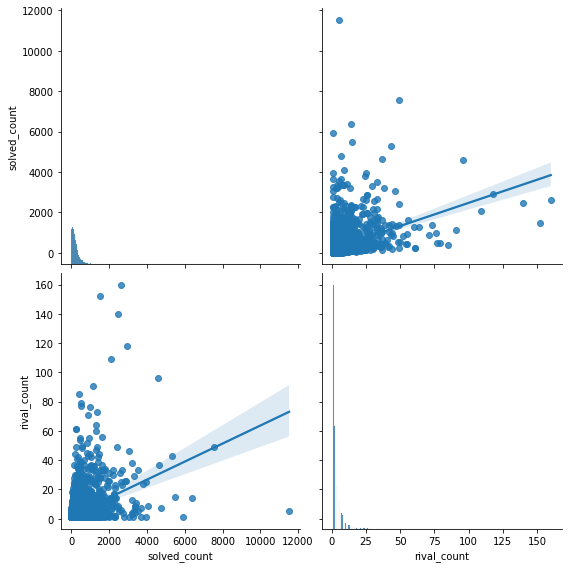

In [91]:
# rival_count와 solved_count와의 관계성을 시각화.

df_for_pairplot = df_has_rival[['solved_count', 'rival_count']]
sns.pairplot(df_for_pairplot, kind='reg', height=4)  # 페어플롯 작성

라이벌 수와 푼 문제 수 간의 약한 관계성이 있어 보입니다.

In [92]:
# 통계적 검정(피어슨 상관계수 검정)을 통해 구체적인 상관관계 파악. *******************************************************************
stats.pearsonr(df_has_rival.rival_count, df_has_rival.solved_count)

(0.37534573142087857, 9.813e-320)

상관관계: 
  
p-value: 
  
    
[정리]
  
라이벌이 많을수록 문제를 푸는 횟수와 약한 상관관계를 보입니다.
  
적절히 큰 라이벌 수를 정하면 문제 푸는 횟수가 늘어날 것으로 보입니다.

In [93]:
# 실험 1: 라이벌이 있는 유저들의 평균적인 라이벌 수는 몇 명일까요?

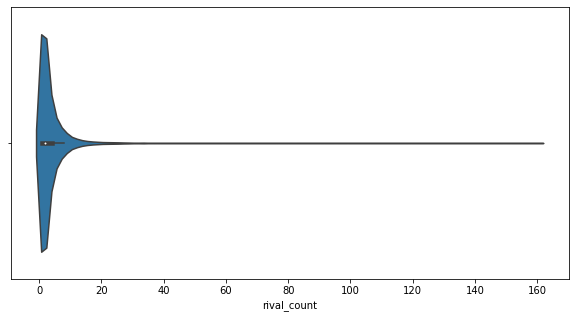

In [94]:
# 실제 데이터의 형상을 보기 위해 바이올린 플롯으로 시각화. https://junklee.tistory.com/9
plt.figure(figsize=(10,5))
sns.violinplot(x='rival_count', data=df_has_rival)

In [95]:
# 라이벌을 100명 이상으로 정한 유저들 확인
df_has_rival[df_has_rival.rival_count >=100]

,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization,has_rival
148,tlsdydaud1,2612,8,25,2620,2190,230,175,591003201,160,78,324,149,425.0,1
200,dj035,1489,7,24,2538,2118,220,175,308789395,152,88,57,201,1026.0,1
259,hibye1217,2443,7,23,2467,2047,220,175,291626527,140,51,121,260,425.0,1
549,malkoring,2087,7,21,2260,1841,220,175,89374309,109,54,114,550,436.0,1
613,hsh8086,2921,6,21,2229,1819,210,175,124550632,118,27,416,614,328.0,1


(-5.0, 15.0)

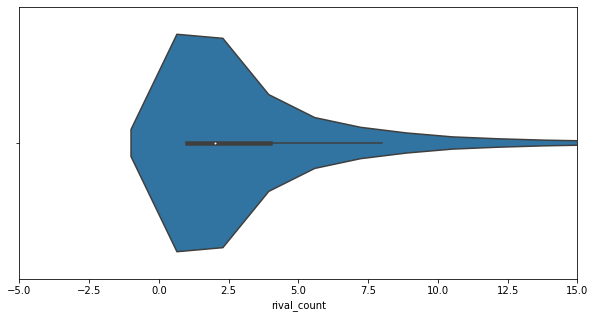

In [96]:
# outside point를 제외한 바이올린 플롯의 부분 확대
plt.figure(figsize=(10,5))
fig = sns.violinplot(x='rival_count', data=df_has_rival)
fig.set_xlim([-5, 15])
#fig.set_ylim([-0.5, 0.5])

In [97]:
# 평균적인 rival 수 확인
print("평균 rival 수:", round(np.mean(df_has_rival.rival_count), 2),'명')

평균 rival 수: 3.74 명


[정리]
  
outside point: 20명 이상
  
upper adjacent values(상위 근접 값: 해당 값보다 크면 이상치로 판별 가능): 8명
  
median: 약 2.5명
  
mean 약 3.74명
  
→ rival 수는 2~3명 추천으로 잡아도 될 것으로 보입니다. 

In [98]:
# 실험 2: 라이벌로 지정할 만한 유저를 찾아볼까요?
# 기준: 나와 비슷한 실력의 유저 또는 나보다 실력이 조금 더 높은 유저

In [99]:
df_users[df_users.handle == '1017hana']

,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization
36157,1017hana,62,0,9,569,522,0,47,714510,0,1,7,59708,NaN


In [100]:
# tier 9(Silver II) 중  1017hana의 라이벌 찾아보기
df_tier_9 = df_users[df_users.tier == 9]
target_user = '1017hana' # 예시로 쓸 타겟 유저

df_tier_9

,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization
33333,0601p,57,0,9,649,606,0,43,4542229,0,0,4,54034,NaN
33334,ambitiouskyle,174,2,9,649,497,50,102,332778,2,3,4,54035,NaN
33335,ashilso29,95,1,9,649,558,25,66,980338,0,0,0,54036,NaN
33336,chjisceo,121,2,9,649,519,50,80,323938,0,0,0,54037,NaN
33337,chl8273,107,1,9,649,551,25,73,685850,0,0,2,54038,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39076,rupertjoo,100,2,9,500,381,50,69,201772,0,0,12,65527,NaN
39077,shinhr0112,236,1,9,500,354,25,121,211637,0,0,9,65528,NaN
39078,skarn2158,58,3,9,500,356,100,44,285588,0,0,5,65529,NaN
39079,whrrk2001,59,0,9,500,455,0,45,594274,0,0,3,65530,NaN


In [101]:
# 1. 타겟 유저와 같거나 한 단계 높은 티어로 실력 범위를 줄입니다.

In [102]:
print('후보수 전:', len(df_users)-1)

df_tier_10 = df_users[df_users.tier == 10]
df_candi_by_tier = pd.concat([df_tier_9, df_tier_10], axis=0)

print('후보수 후:', len(df_candi_by_tier)-1)
df_candi_by_tier[df_candi_by_tier.tier == 9]

후보수 전: 88289
후보수 후: 10195


,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization
33333,0601p,57,0,9,649,606,0,43,4542229,0,0,4,54034,NaN
33334,ambitiouskyle,174,2,9,649,497,50,102,332778,2,3,4,54035,NaN
33335,ashilso29,95,1,9,649,558,25,66,980338,0,0,0,54036,NaN
33336,chjisceo,121,2,9,649,519,50,80,323938,0,0,0,54037,NaN
33337,chl8273,107,1,9,649,551,25,73,685850,0,0,2,54038,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39076,rupertjoo,100,2,9,500,381,50,69,201772,0,0,12,65527,NaN
39077,shinhr0112,236,1,9,500,354,25,121,211637,0,0,9,65528,NaN
39078,skarn2158,58,3,9,500,356,100,44,285588,0,0,5,65529,NaN
39079,whrrk2001,59,0,9,500,455,0,45,594274,0,0,3,65530,NaN


In [103]:
df_candi_by_tier[df_candi_by_tier.tier == 10]

,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization
28885,b9635005,103,0,10,799,728,0,71,2687717,0,0,0,45136,NaN
28886,ben3802,144,2,10,799,659,50,90,561917,0,0,3,45137,NaN
28887,bright_night_sky,501,2,10,799,588,50,161,698580,0,0,1,45138,NaN
28888,camosss,85,3,10,799,638,100,61,891946,0,0,5,45139,NaN
28889,chlasnmzx2,99,1,10,799,706,25,68,1340157,0,2,6,45140,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33328,thqjarl,83,2,10,650,540,50,60,437329,5,5,10,54029,NaN
33329,tjrkd222,99,1,10,650,557,25,68,794529,0,0,3,54030,NaN
33330,whtjdwo98,105,2,10,650,528,50,72,605090,0,0,5,54031,NaN
33331,whwlsgkr7,125,2,10,650,519,50,81,443764,0,0,2,54032,NaN


In [104]:
df_candi_by_tier.head()

,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization
33333,0601p,57,0,9,649,606,0,43,4542229,0,0,4,54034,NaN
33334,ambitiouskyle,174,2,9,649,497,50,102,332778,2,3,4,54035,NaN
33335,ashilso29,95,1,9,649,558,25,66,980338,0,0,0,54036,NaN
33336,chjisceo,121,2,9,649,519,50,80,323938,0,0,0,54037,NaN
33337,chl8273,107,1,9,649,551,25,73,685850,0,0,2,54038,229.0


In [105]:
# 2. rating_by_problems_sum(푼 문제의 난이도 합으로 계산한 사용자의 레이팅)이 비슷한 유저들로 범위 줄이기

In [106]:
t_rating_b_problems_sum = df_tier_9[df_tier_9.handle == target_user].rating_by_problems_sum.values[0] 
print(target_user+'의 rating_by_problems_sum:', t_rating_b_problems_sum)

1017hana의 rating_by_problems_sum: 522


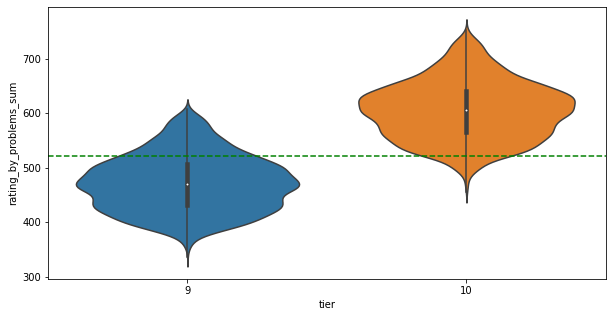

In [107]:
# target user가 속한 티어와 한 단계 높은 티어와의 rating_by_problems_sum 분포 확인
# 초록색 점선: target user의 rating_by_problems_sum

plt.figure(figsize=(10,5))
sns.violinplot(x="tier", y="rating_by_problems_sum", data=df_candi_by_tier)
plt.axhline(y=t_rating_b_problems_sum, color='g', linestyle='--')

tier10의 rating_by_problems_sum: 540


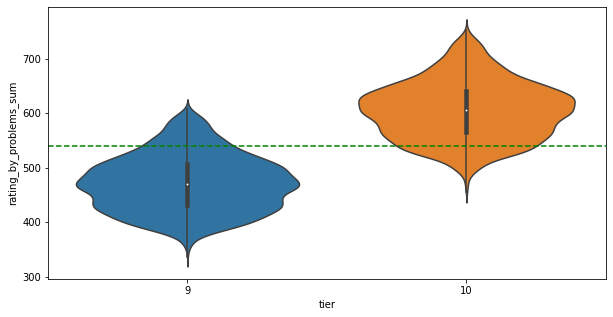

In [108]:
up_target_user = 'thqjarl' # 예시로 쓸 타겟 유저
up_rating_b_problems_sum = df_tier_10[df_tier_10.handle == up_target_user].rating_by_problems_sum.values[0]
print('tier10의 rating_by_problems_sum:', up_rating_b_problems_sum)

plt.figure(figsize=(10,5))
sns.violinplot(x="tier", y="rating_by_problems_sum", data=df_candi_by_tier)
plt.axhline(y=up_rating_b_problems_sum, color='g', linestyle='--')

타겟 유저는 현재 속한 티어에서 중상위권 유저임을 알 수 있습니다.
  
한 단계 높은 레벨에서도 하위권에 속함을 알 수 있습니다.
  
타겟 유저보다 rating_by_problems_sum이 100(임시) 높은 유저로 바운더리 정하는 게 좋아 보입니다. 

In [109]:
# 타겟 유저의 rating_by_problems_sum <= 후보군 rating_by_problems_sum <= 타겟 유저의 rating_by_problems_sum + 100
threshold = 100

print('후보수 후:', len(df_candi_by_tier)-1)
df_candi_by_rbps = df_candi_by_tier[(df_candi_by_tier.rating_by_problems_sum >= t_rating_b_problems_sum) & (df_candi_by_tier.rating_by_problems_sum <= t_rating_b_problems_sum+threshold)]
print('후보수 후:',len(df_candi_by_rbps)-1)
df_candi_by_rbps.head()

후보수 후: 10195
후보수 후: 3535


,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization
33333,0601p,57,0,9,649,606,0,43,4542229,0,0,4,54034,NaN
33335,ashilso29,95,1,9,649,558,25,66,980338,0,0,0,54036,NaN
33337,chl8273,107,1,9,649,551,25,73,685850,0,0,2,54038,229.0
33338,csho,112,1,9,649,549,25,75,481349,0,0,0,54039,272.0
33340,dltkdgkr123,96,1,9,649,557,25,67,807233,0,0,7,54041,NaN


# **PASS Processing df_problems_solved**

In [110]:
df_usp = pd.merge(df_users, df_problems_solved, on='handle')
# null이 담긴 사용자 제거
df_usp = df_usp[~df_usp.problems.isnull()]
df_usp

,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization,id,problems,num
0,koosaga,11522,10,31,3264,2814,250,175,15362924779,5,122,24,1,394.0,1,"1000,1001,1002,1003,1004,1005,1006,1007,1008,1...",6094
1,cki86201,6088,10,31,3225,2775,250,175,10013721021,0,30,3,2,299.0,2,"1000,1001,1002,1003,1004,1005,1006,1007,1008,1...",5867
2,mitnegativeinfinity,2267,10,31,3176,2726,250,175,6416744374,0,12,8,3,440.0,3,"1000,1001,1019,1056,1067,1144,1150,1311,1372,1...",2269
3,ainta,4172,10,31,3156,2706,250,175,7428922337,0,14,2,4,299.0,4,"1000,1001,1002,1003,1004,1005,1007,1008,1009,1...",4207
4,yclock,2730,10,31,3126,2676,250,175,4336235487,4,16,6,5,299.0,5,"1000,1001,1002,1003,1004,1005,1007,1008,1009,1...",2753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100949,wish1234567,78,0,0,0,0,0,0,0,0,1,9,166801,451.0,89701,"1000,1001,1008,1050,1110,1112,1152,1271,1330,1...",78
100950,wjd0632,48,0,0,0,0,0,0,0,0,0,5,166805,NaN,89705,"1000,1001,1002,1008,1020,1182,1269,1654,1707,1...",47
100951,wodnr2203,97,0,0,0,0,0,0,0,0,0,3,166828,1348.0,89728,"1000,1001,1002,1003,1008,1009,1010,1032,1037,1...",109
100952,yasuicide,45,0,0,0,0,0,0,0,0,0,0,166910,NaN,89760,"1201,1260,1787,1920,2178,5466,5537,8131,8873,8...",42


In [111]:
# 3. 타겟 유저 푼 태그 기반으로 나의 부족한 점을 더 많이 푼 유저 찾기

In [112]:
df_problems = df_problems[df_problems.level != 0]
# not_solvable == False만
df_problems = df_problems[df_problems.isSolvable == True]
# tag가 nan인 문제 제거
df_problems = df_problems[~df_problems.tags.isnull()]
df_problems.head()

,problemId,titleKo,isSolvable,acceptedUserCount,level,averageTries,tags,tag_num
0,1000,A+B,True,199179,1,2,"implementation,arithmetic,math",3
1,1001,A-B,True,168110,1,1,"implementation,arithmetic,math",3
2,1002,터렛,True,28569,8,4,"geometry,math",2
3,1003,피보나치 함수,True,37972,8,3,dp,1
4,1004,어린 왕자,True,10649,8,2,geometry,1


In [113]:
# 후보 유저들만 추리기  PASS Processing df_problems_solved
candi_users = df_candi_by_rbps.handle.values
df_usp_candi = df_usp[df_usp.handle.isin(candi_users)]
df_usp_candi

,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization,id,problems,num
41492,bright_night_sky,501,2,10,799,588,50,161,698580,0,0,1,45138,NaN,28888,"1000,1001,1008,1009,1026,1032,1065,1075,1076,1...",501
41502,gmltn1564,145,3,10,799,609,100,90,463962,0,0,4,45148,425.0,28898,"1000,1001,1002,1003,1008,1011,1012,1021,1026,1...",145
41512,machinelearningquant,143,3,10,799,609,100,90,663172,0,1,13,45208,NaN,28908,"1000,1001,1003,1008,1065,1085,1110,1152,1157,1...",143
41529,dkan9634,257,2,10,798,621,50,127,556078,0,0,23,45225,356.0,28925,"1000,1001,1008,1010,1026,1037,1065,1085,1110,1...",274
41534,eos0103,294,2,10,798,613,50,135,850858,0,0,1,45230,NaN,28930,"1000,1001,1008,1018,1037,1065,1075,1076,1085,1...",295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49164,skk,42,0,9,559,526,0,33,2374102,2,1,2,60504,NaN,36554,"1197,1208,1238,1253,1261,1463,1655,1670,1717,1...",42
49165,skyfly,41,0,9,559,526,0,33,7872076,0,0,1,60505,NaN,36555,"1000,1077,1654,1658,1707,1708,1753,1790,1912,2...",42
49228,lovecall27,41,0,9,557,524,0,33,6081819,0,0,2,60618,NaN,36618,"1012,1026,1043,1120,1138,1181,1197,1238,1260,1...",94
49248,bangjook88,41,0,9,556,523,0,33,3333557,0,0,2,60638,NaN,36638,"1185,1197,1260,1463,1477,1516,1517,1654,1697,1...",41


In [114]:
# 필요한 태그 칼럼 정리하기
tags = ['math', 'implementation', 'greedy', 'string', 'data-structures', 'geometry', 'dp', 'dfs', 'bfs']
for x in tags:
    df_usp_candi[x] = 0

df_usp_candi

,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,...,num,math,implementation,greedy,string,data-structures,geometry,dp,dfs,bfs
41492,bright_night_sky,501,2,10,799,588,50,161,698580,0,...,501,0,0,0,0,0,0,0,0,0
41502,gmltn1564,145,3,10,799,609,100,90,463962,0,...,145,0,0,0,0,0,0,0,0,0
41512,machinelearningquant,143,3,10,799,609,100,90,663172,0,...,143,0,0,0,0,0,0,0,0,0
41529,dkan9634,257,2,10,798,621,50,127,556078,0,...,274,0,0,0,0,0,0,0,0,0
41534,eos0103,294,2,10,798,613,50,135,850858,0,...,295,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49164,skk,42,0,9,559,526,0,33,2374102,2,...,42,0,0,0,0,0,0,0,0,0
49165,skyfly,41,0,9,559,526,0,33,7872076,0,...,42,0,0,0,0,0,0,0,0,0
49228,lovecall27,41,0,9,557,524,0,33,6081819,0,...,94,0,0,0,0,0,0,0,0,0
49248,bangjook88,41,0,9,556,523,0,33,3333557,0,...,41,0,0,0,0,0,0,0,0,0


In [115]:
def class_user_tag(df):    
    # 특정 유저가 푼 problems 구하기
    for user in tqdm(candi_users):
        if (len(df[df.handle == user].problems.values) == 0):
            continue;
        df_one_user_problems = df[df.handle == user].problems.values[0]
        one_user_problems = df_one_user_problems.split(',')

        # 특정 유저가 푼 problems의 태그 값들 구하기
        user_tag = []
        for i in range(len(one_user_problems)):
            one_problem = df_problems[df_problems.problemId == int(one_user_problems[i])]
            one_problem_tags = ','.join(one_problem.tags.values).split(',')
            user_tag.extend(one_problem_tags)

        # 특정 유저가 푼 태그별 개수 구하기: e.g. counts = {'arithmetic': 1, 'implementation': 3, 'math': 10, ... }
        counts = dict()
        for i in user_tag:
            counts[i] = counts.get(i, 0) + 1

        # 특정 유저의 태그 칼럼에 각 태그 값 넣기
        idx = df[df['handle'] == user].index
        for k, v in counts.items():
            if k in df.columns:
                df.loc[idx, k] = v

    return df

In [116]:
df_candi_with_tags = class_user_tag(df_usp_candi)

100%|██████████| 3536/3536 [05:05<00:00, 11.59it/s]


In [117]:
# 라이벌 유저군들의 푼 태그 수와 타겟 유저가 푼 태그 수 확인
df_target_candi_tags = pd.DataFrame(df_candi_with_tags.sum(axis=0)[tags]).reset_index()
df_target_candi_tags.columns = ['tags', 'num']
df_target_candi_tags.num = df_target_candi_tags.num/len(df_candi_with_tags)

target_tags_values = df_candi_with_tags[df_candi_with_tags.handle == target_user][tags].values
df_target_candi_tags['target'] = target_tags_values[0]
df_target_candi_tags

,tags,num,target
0,math,49.041088,10
1,implementation,61.148767,7
2,greedy,5.97393,7
3,string,15.007934,7
4,data-structures,0.0,0
5,geometry,3.28195,1
6,dp,9.493341,12
7,dfs,3.514877,5
8,bfs,5.597053,9


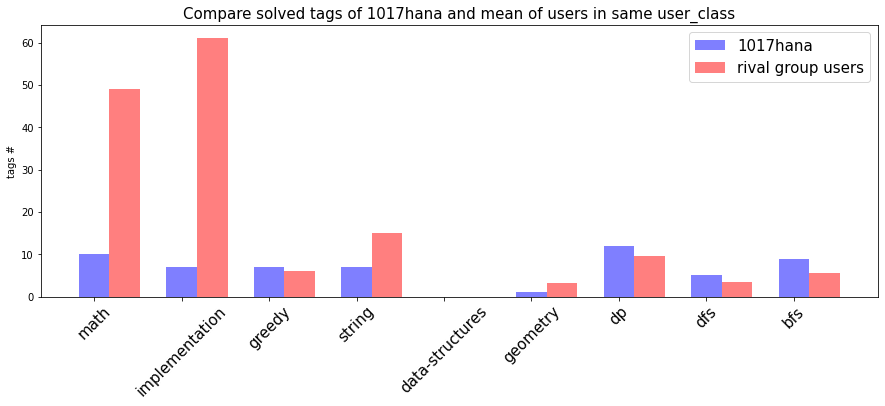

In [118]:
# 라이벌 유저군 보다 내가 부족한 태그 부분 확인
bar_width = 0.35
alpha = 0.5
index = np.arange(9)
label = df_target_candi_tags.tags

plt.figure(figsize=(15,5))
p1 = plt.bar(index, df_target_candi_tags.target, bar_width, 
             color='b', alpha=alpha,label=target_user)

p2 = plt.bar(index + bar_width, df_target_candi_tags.num, bar_width, 
            color='r', alpha=alpha,label='mean_users')

plt.title('Compare solved tags of '+target_user+' and mean of users in same user_class', fontsize=15)
plt.ylabel('tags #', fontsize=10)
#plt.xlabel('tags', fontsize=18)
plt.xticks(index, label, fontsize=15, rotation=45)
plt.legend((p1[0], p2[0]), (target_user, 'rival group users'), fontsize=15)
plt.show()

타겟 유저는 라이벌 유저군보다 Implementation, math, (string, geometry) 를 적게 

풀었습니다.
  
greedy, dp, dfs, bfs는 더 많이 풀었음을 알 수 있네요. 😎

In [119]:
need_more_tags = df_target_candi_tags[df_target_candi_tags.num > df_target_candi_tags.target].tags.values
need_more_tags

array(['math', 'implementation', 'string', 'geometry'], dtype=object)

In [120]:
# 라이벌 유저군들 중에서 내가 부족한 부분을 더 공부한 유저 확인
tag_candi = df_candi_with_tags.copy()

print('후보수 후:',len(df_candi_by_rbps)-1)
for x in need_more_tags:
    tag_candi = tag_candi[tag_candi[x] >= tag_candi[tag_candi.handle==target_user][x].values[0]]
    print(x+' 태그 필터링 후: ', end='')
    print(len(tag_candi)-1)

후보수 후: 3535
math 태그 필터링 후: 3253
implementation 태그 필터링 후: 3231
string 태그 필터링 후: 2787
geometry 태그 필터링 후: 2475


In [121]:
# 4. 후보군들 중 랜덤으로 3명을 추출해봅니다.

In [122]:
seed = 42

fin_candi = tag_candi[tag_candi.handle != target_user].reset_index()

seq = list(np.arange(len(fin_candi)))
random.seed(seed)
target_rivals_3 = random.sample(seq, 3)
target_rivals_3

[456, 102, 1126]

In [123]:
fin_candi.iloc[target_rivals_3]

,index,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,...,num,math,implementation,greedy,string,data-structures,geometry,dp,dfs,bfs
456,43153,ghdtmddk1516,130,2,10,739,605,50,84,762678,...,132,49,74,1,18,0,2,3,14,16
102,42313,lego7457,197,2,10,767,607,50,110,516114,...,199,97,110,6,13,0,8,17,4,5
1126,44239,jcy6343,128,2,10,702,569,50,83,2989963,...,128,65,74,3,14,0,5,5,2,2


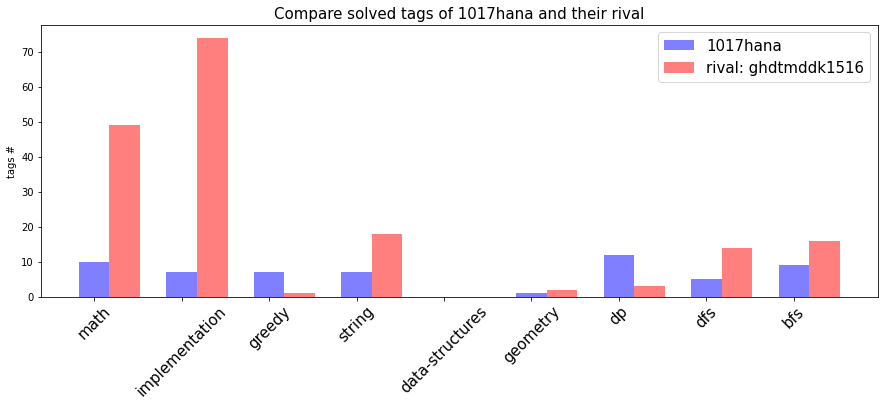

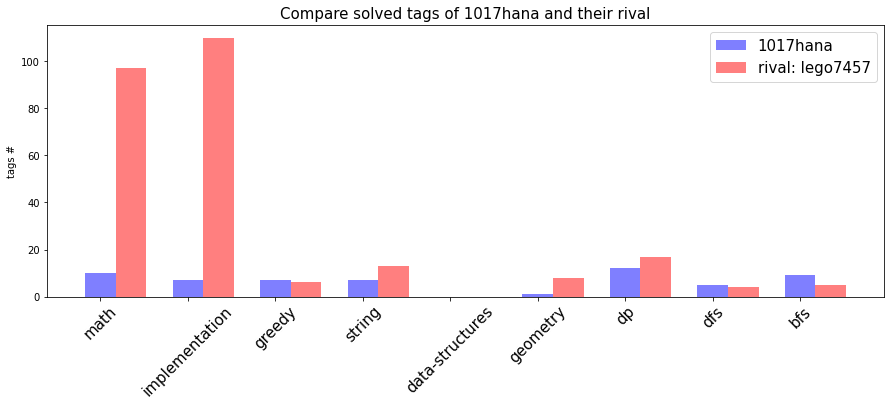

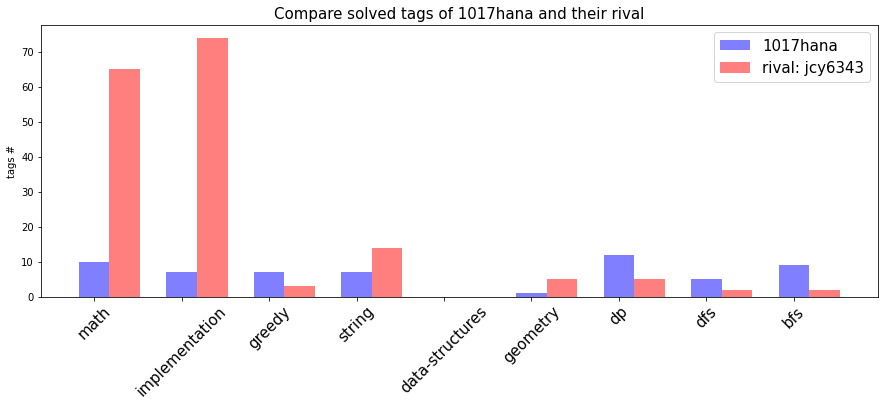

In [124]:
# 라이벌 유저군 보다 내가 부족한 태그 부분 확인
bar_width = 0.35
alpha = 0.5
index = np.arange(9)
label = df_target_candi_tags.tags

for i in range(3):
    rival_data = fin_candi.iloc[target_rivals_3[i]]
    plt.figure(figsize=(15,5))
    p1 = plt.bar(index, tag_candi[tag_candi.handle == target_user][tags].values[0], bar_width, 
                color='b', alpha=alpha,label=target_user)

    p2 = plt.bar(index + bar_width, rival_data[tags].values, bar_width, 
                color='r', alpha=alpha,label='mean_users')

    plt.title('Compare solved tags of '+target_user+' and their rival', fontsize=15)
    plt.ylabel('tags #', fontsize=10)
    #plt.xlabel('tags', fontsize=18)
    plt.xticks(index, label, fontsize=15, rotation=45)
    plt.legend((p1[0], p2[0]), (target_user, 'rival: '+rival_data.handle), fontsize=15)
    plt.show()

비슷한 라이벌과 비교했을 때 타겟 유저가 상대적으로 덜 푼 태그 유형이 보이네요.

## 💡 유저와 문제풀이 관련 실험 및 결과
  
유저와 문제 풀이에 관해 분석한 데이터를 바탕으로 가설을 세우고 검증해볼게요.

이를 통해 어떤 방법으로 추천 모델을 만들어야 할지, 필터링은 어떤 식으로 해야할지 고민해 봅시다.

가설. 유저 클래스별 많이 푸는 태그 유형이 있을 것입니다.
  
우선 unique한 태그 값을 구하여 새로운 칼럼으로 추가해 봅시다. 😏

In [125]:
unique_tags = []
all_tags = df_problems.tags.str.split(',').values

for x in all_tags:
    unique_tags.extend(x)
    
unique_tags = set(unique_tags)

In [126]:
# 새로운 칼럼으로 추가하기
tmp = df_usp.copy()

for x in unique_tags:
    tmp[x] = 0
tmp

,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,...,precomputation,hirschberg,polygon_area,degree_sequence,arithmetic,topological_sorting,tree_set,simulated_annealing,pollard_rho,bfs
0,koosaga,11522,10,31,3264,2814,250,175,15362924779,5,...,0,0,0,0,0,0,0,0,0,0
1,cki86201,6088,10,31,3225,2775,250,175,10013721021,0,...,0,0,0,0,0,0,0,0,0,0
2,mitnegativeinfinity,2267,10,31,3176,2726,250,175,6416744374,0,...,0,0,0,0,0,0,0,0,0,0
3,ainta,4172,10,31,3156,2706,250,175,7428922337,0,...,0,0,0,0,0,0,0,0,0,0
4,yclock,2730,10,31,3126,2676,250,175,4336235487,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100949,wish1234567,78,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100950,wjd0632,48,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100951,wodnr2203,97,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100952,yasuicide,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
sorted(list(tmp.user_class.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [128]:
def class_user_tag(user_class):

    users = tmp[tmp.user_class == user_class].handle.values
    
    # 특정 유저가 푼 problems 구하기
    for user in tqdm(users):
        df_one_user_problems = df_usp[df_usp.handle == user].problems.values[0]
        one_user_problems = df_one_user_problems.split(',')

        # 특정 유저가 푼 problems의 태그 값들 구하기
        user_tag = []
        for i in range(len(one_user_problems)):
            if one_user_problems[i] == '':
              continue
            one_problem = df_problems[df_problems.problemId == int(one_user_problems[i])]
            one_problem_tags = ','.join(one_problem.tags.values).split(',')
            user_tag.extend(one_problem_tags)

        # 특정 유저가 푼 태그별 개수 구하기: e.g. counts = {'arithmetic': 1, 'implementation': 3, 'math': 10, ... }
        counts = dict()
        for i in user_tag:
            counts[i] = counts.get(i, 0) + 1

        # 특정 유저의 태그 칼럼에 각 태그 값 넣기
        idx = tmp[tmp['handle'] == user].index
        for k, v in counts.items():
            tmp.loc[idx, k] = v

    return tmp

In [129]:
# 클래스 10인 유저가 많이 푼 태그 목록
class_num = 10

tmp_10 = class_user_tag(class_num)
tags_10_sum = pd.DataFrame(tmp_10[tmp_10.user_class == class_num].sum(axis=0)[unique_tags]).reset_index()
tags_10_sum.columns = ['tag', 'num']
tags_10_sum = tags_10_sum.sort_values('num', ascending=False).reset_index(drop=True)
tags_10_sum#.head()

100%|██████████| 23/23 [00:40<00:00,  1.77s/it]


,tag,num
0,math,16393
1,implementation,14377
2,data_structures,9937
3,dp,9585
4,graphs,8815
...,...,...
186,geometric_boolean_operations,3
187,degree_sequence,3
188,differential_cryptanalysis,3
189,rb_tree,2


In [130]:
# 클래스 6인 유저가 많이 푼 태그 목록
class_num = 6

tmp_6 = class_user_tag(class_num)
tags_6_sum = pd.DataFrame(tmp_6[tmp_6.user_class == class_num].sum(axis=0)[unique_tags]).reset_index()
tags_6_sum.columns = ['tag', 'num']
tags_6_sum = tags_6_sum.sort_values('num', ascending=False).reset_index(drop=True)
tags_6_sum.head(10)

100%|██████████| 600/600 [05:33<00:00,  1.80it/s]


,tag,num
0,implementation,130358
1,math,128911
2,graphs,68725
3,dp,65226
4,data_structures,57516
5,arithmetic,46687
6,graph_traversal,44187
7,string,44003
8,bruteforcing,35874
9,sorting,33225


In [131]:
# 클래스 3인 유저가 많이 푼 태그 목록
class_num = 3

tmp_3 = class_user_tag(class_num)
tags_3_sum = pd.DataFrame(tmp_3[tmp_3.user_class == class_num].sum(axis=0)[unique_tags]).reset_index()
tags_3_sum.columns = ['tag', 'num']
tags_3_sum = tags_3_sum.sort_values('num', ascending=False).reset_index(drop=True)
tags_3_sum.head(10)

100%|██████████| 14338/14338 [51:47<00:00,  4.61it/s]


,tag,num
0,implementation,1403366
1,math,1137952
2,arithmetic,487925
3,graphs,435564
4,string,411641
5,dp,408590
6,graph_traversal,364071
7,data_structures,363024
8,bruteforcing,319907
9,sorting,312915


In [132]:
# 클래스 0인 유저가 많이 푼 태그 목록
class_num = 0

tmp_0 = class_user_tag(class_num)
tags_0_sum = pd.DataFrame(tmp_0[tmp_0.user_class == class_num].sum(axis=0)[unique_tags]).reset_index()
tags_0_sum.columns = ['tag', 'num']
tags_0_sum = tags_0_sum.sort_values('num', ascending=False).reset_index(drop=True)
tags_0_sum.head(10)

100%|██████████| 32624/32624 [33:53<00:00, 16.05it/s]


,tag,num
0,implementation,599331
1,math,422718
2,graphs,224532
3,arithmetic,205763
4,dp,180669
5,graph_traversal,177168
6,bruteforcing,143788
7,bfs,142309
8,data_structures,138215
9,string,121616


유저별 수준과 tag는 상관관계가 있다고 보았고, tag 정보를 유저가 푸는 문제를 파악하는데 사용할 수 있을 것으로 판단했습니다. 🙂

실험: 같은 클래스 내 태그별 평균적으로 푼 횟수와 한 유저가 푼 횟수를 비교해봅시다.
  
유저 클래스가 10인 유저를 선정해서 분석해봅시다.

In [137]:
def one_user_tag(user):
    df_one_user_problems = df_usp[df_usp.handle == user].problems.values[0]
    one_user_problems = df_one_user_problems.split(',')

    # 특정 유저가 푼 problems의 태그 값들 구하기
    user_tag = []
    for i in range(len(one_user_problems)):
        one_problem = df_problems[df_problems.problemId == int(one_user_problems[i])]
        one_problem_tags = ','.join(one_problem.tags.values).split(',')
        user_tag.extend(one_problem_tags)

    # 특정 유저가 푼 태그별 개수 구하기: e.g. counts = {'arithmetic': 1, 'implementation': 3, 'math': 10, ... }
    counts = dict()
    for i in user_tag:
        counts[i] = counts.get(i, 0) + 1
    # 특정 유저의 태그 칼럼에 각 태그 값 넣기
    #idx = tmp[tmp['handle'] == user].index
    #for k, v in counts.items():
    #    tmp.loc[idx, k] = v

    return counts

In [134]:
df_usp[df_usp.user_class == 10].head()

,handle,solved_count,user_class,tier,rating,rating_by_problems_sum,rating_by_class,rating_by_solved_count,exp,rival_count,reverse_rival_count,max_streak,rank,organization,id,problems,num
0,koosaga,11522,10,31,3264,2814,250,175,15362924779,5,122,24,1,394.0,1,"1000,1001,1002,1003,1004,1005,1006,1007,1008,1...",6094
1,cki86201,6088,10,31,3225,2775,250,175,10013721021,0,30,3,2,299.0,2,"1000,1001,1002,1003,1004,1005,1006,1007,1008,1...",5867
2,mitnegativeinfinity,2267,10,31,3176,2726,250,175,6416744374,0,12,8,3,440.0,3,"1000,1001,1019,1056,1067,1144,1150,1311,1372,1...",2269
3,ainta,4172,10,31,3156,2706,250,175,7428922337,0,14,2,4,299.0,4,"1000,1001,1002,1003,1004,1005,1007,1008,1009,1...",4207
4,yclock,2730,10,31,3126,2676,250,175,4336235487,4,16,6,5,299.0,5,"1000,1001,1002,1003,1004,1005,1007,1008,1009,1...",2753


In [135]:
# 랜덤으로 뽑은 arnold518 핸들을 지닌 유저를 분석해볼게요.

In [139]:
user_name = 'arnold518'
user_counts = one_user_tag(user_name)

In [140]:
user_10_tag = tags_10_sum.copy()
user_10_tag['user'] = 0

for k, v in user_counts.items():
    idx = user_10_tag[user_10_tag.tag == k].index
    user_10_tag.loc[idx, 'user'] = v

In [141]:
user_10_tag.num = user_10_tag.num / len(df_usp[df_usp.user_class == 10])
user_10_tag

,tag,num,user
0,math,712.73913,122
1,implementation,625.086957,59
2,data_structures,432.043478,338
3,dp,416.73913,344
4,graphs,383.26087,195
...,...,...,...
186,geometric_boolean_operations,0.130435,0
187,degree_sequence,0.130435,0
188,differential_cryptanalysis,0.130435,0
189,rb_tree,0.086957,0


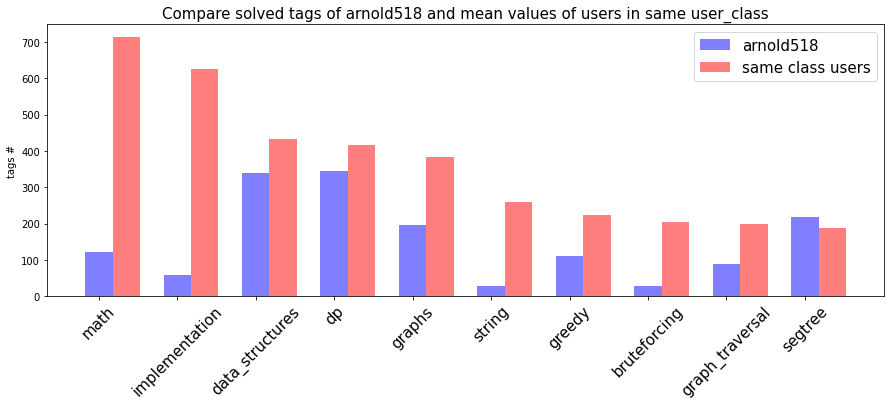

In [142]:
top10_user_10_tag = user_10_tag.head(10)

bar_width = 0.35
alpha = 0.5
index = np.arange(10)
label = top10_user_10_tag.tag

plt.figure(figsize=(15,5))
p1 = plt.bar(index, top10_user_10_tag.user, bar_width, 
             color='b', alpha=alpha,label=user_name)

p2 = plt.bar(index + bar_width, top10_user_10_tag.num, bar_width, 
            color='r', alpha=alpha,label='mean_users')

plt.title('Compare solved tags of '+user_name+' and mean values of users in same user_class', fontsize=15)
plt.ylabel('tags #', fontsize=10)
#plt.xlabel('tags', fontsize=18)
plt.xticks(index, label, fontsize=15, rotation=45)
plt.legend((p1[0], p2[0]), (user_name, 'same class users'), fontsize=15)
plt.show()

arnold518은 같은 클래스 내 유저들에 비해 implementation, string, bruteforcing이 현저히 적음을 알 수 있습니다.
  
나중에 같은 Class 내 다른 유저들의 풀이 이력과 비교하여 유저가 많이 풀지 않은 tag 문제 위주로 추천하는 방법을 떠올려볼 수 있겠네요. 🤔